In [62]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

In [64]:
# these files are in the data folder of the github repository 
X=np.load('rainfed_maize_production_Xgrid.npy')
Y=np.load('rainfed_maize_production_Ygrid.npy')

In [65]:
# these files are in the data folder of the github repository 
pnt_IA=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_IA.csv')
pnt_MN=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_MN.csv')
pnt_WI=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_WI.csv')
pnt_IL=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_IL.csv')
pnt_MI=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_MI.csv')
pnt_IN=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_IN.csv')
pnt_OH=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_OH.csv')
pnt_NY=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_NY.csv')
pnt_PA=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_PA.csv')
pnt_MD=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_MD.csv')
pnt_ON=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_ON.csv')
pnt_QC=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_QC.csv')

In [66]:
pnt_IA

,Unnamed: 0,lon,lat,coords
0,2587,-96.25,43.25,POINT (-96.25 43.25)
1,2588,-95.75,43.25,POINT (-95.75 43.25)
2,2589,-95.25,43.25,POINT (-95.25 43.25)
3,2590,-94.75,43.25,POINT (-94.75 43.25)
4,2591,-94.25,43.25,POINT (-94.25 43.25)
...,...,...,...,...
60,2893,-93.25,40.75,POINT (-93.25 40.75)
61,2894,-92.75,40.75,POINT (-92.75 40.75)
62,2895,-92.25,40.75,POINT (-92.25 40.75)
63,2896,-91.75,40.75,POINT (-91.75 40.75)


In [67]:
df = pd.DataFrame(columns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs'])
thecolumns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs']

In [68]:
# generated by /media/Data1/Climada/isimip3/A3_read_ISIMIP3a_yields-maize_github.ipynb
# these files are in the data folder of the github repository 
production_2000_isimip3a=np.load('/media/Data1/Climada/isimip3/isimip3a_production_2000.npy')
production_2005_isimip3a=np.load('/media/Data1/Climada/isimip3/isimip3a_production_2005.npy')
production_2010_isimip3a=np.load('/media/Data1/Climada/isimip3/isimip3a_production_2010.npy')
production_1995to2014_isimip3a=np.load('/media/Data1/Climada/isimip3/isimip3a_1995to2014_production.npy')

## Calculate 12 provinces/states production from isimip3a

### 1. 20-year averages

In [69]:
#20-year average
Data=production_1995to2014_isimip3a
#Ontario
pp=np.empty(shape=(13))
ptlist=list(pnt_ON['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Ontario (ON)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Quibec
pp=np.empty(shape=(13))
ptlist=list(pnt_QC['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Quebec (QC)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


#'Iowa (IA)'
pp=np.empty(shape=(13))
ptlist=list(pnt_IA['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Iowa (IA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Minnesota(MN)
pp=np.empty(shape=(13))
ptlist=list(pnt_MN['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Minnesota(MN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Wisconsin(WI)
ptlist=list(pnt_WI['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Wisconsin(WI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Illinois(IL)
ptlist=list(pnt_IL['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Illinois(IL)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Michigan(MI)
ptlist=list(pnt_MI['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Michigan(MI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Indiana(IN)
ptlist=list(pnt_IN['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Indiana(IN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


#Ohio (OH)
ptlist=list(pnt_OH['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Ohio (OH)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#New York (NY)
ptlist=list(pnt_NY['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['New York (NY)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Pennsylvania(PA)
ptlist=list(pnt_PA['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Pennsylvania(PA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Maryland(MD)
ptlist=list(pnt_MD['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Maryland(MD)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)



In [70]:
df

,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),8909562.0,8851877.0,8781633.0,8611990.0,8582367.0,8483081.0,8834818.0,8612481.0,8624285.0,8719097.0,8558581.0,8688161.0,4528472.0
1,Quebec (QC),4565072.0,4518346.0,4494205.0,4493031.0,4235575.0,4423170.0,4406943.0,4328103.0,4316590.0,4340738.0,4403155.0,4411357.0,3157263.0
2,Iowa (IA),46729288.0,46241895.0,46298367.0,45879288.0,46387809.0,46180440.0,46570322.0,45762321.0,46109641.0,46559252.0,46791583.0,46319110.0,52161618.0
3,Minnesota(MN),26288524.0,25513372.0,25558467.0,25453761.0,25403908.0,25042280.0,26486379.0,25339665.0,25495409.0,25781512.0,25532205.0,25626862.0,29563904.0
4,Wisconsin(WI),13202652.0,13187753.0,13173480.0,12921879.0,13179368.0,13056561.0,13469071.0,13139873.0,13240256.0,13268658.0,13420628.0,13205471.0,11515741.0
5,Illinois(IL),38690100.0,38651703.0,38446215.0,37933070.0,38190102.0,37771245.0,37832683.0,37999356.0,37894008.0,38459906.0,38679541.0,38231630.0,47669473.0
6,Michigan(MI),9516293.0,9622934.0,9535076.0,9303033.0,9484692.0,9309477.0,9578707.0,9480131.0,9520169.0,9590440.0,9558004.0,9499905.0,7118776.0
7,Indiana(IN),20184420.0,20189602.0,19852356.0,19689666.0,19902082.0,19666283.0,19833940.0,19836214.0,19701307.0,20101160.0,19695968.0,19877545.0,20731290.0
8,Ohio (OH),13311228.0,12985357.0,13013858.0,12814645.0,12886626.0,12584778.0,12861057.0,12921109.0,12801416.0,13122181.0,12963508.0,12933251.0,12502459.0
9,New York (NY),4483919.0,4389841.0,4407332.0,4298255.0,4320844.0,4302096.0,4283410.0,4353447.0,4328606.0,4330752.0,4346525.0,4349548.0,1574141.0


In [71]:
df.to_csv('isimip3a_12states_production_1995to2014.csv')

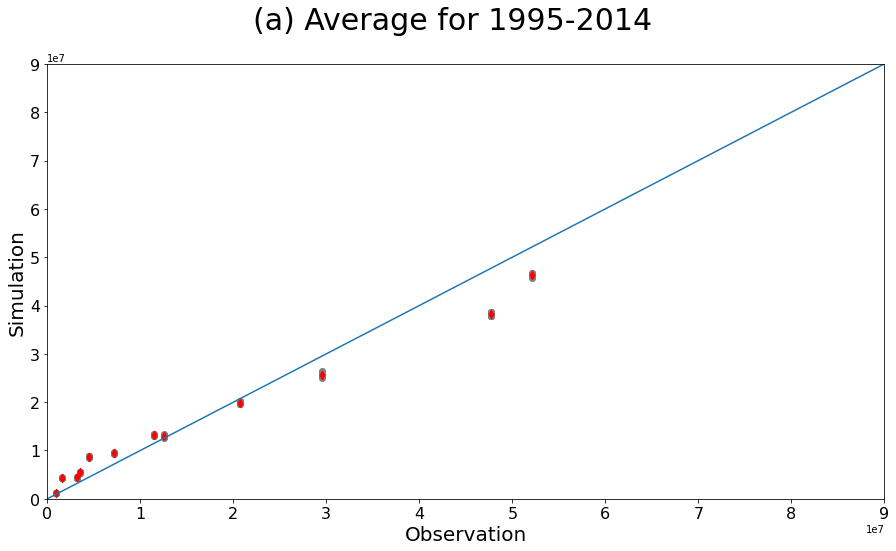

In [72]:
fig = plt.figure(figsize=(15, 8))


plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,9e7])
plt.ylim([0,9e7])

plt.plot([0,9e7],[0,9e7])
#plt.ylabel('Simulation')
plt.suptitle('(a) Average for 1995-2014', fontsize=30)
fig.savefig('Figure4A_isimip3a_production_states_average.png',dpi=150)

In [73]:
### 2. 2000 production

In [74]:
#Data for the year 2000
df = pd.DataFrame(columns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs'])
thecolumns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs']
Data=production_2000_isimip3a
#Ontario
pp=np.empty(shape=(13))
ptlist=list(pnt_ON['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Ontario (ON)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Quibec
pp=np.empty(shape=(13))
ptlist=list(pnt_QC['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Quebec (QC)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


#'Iowa (IA)'
pp=np.empty(shape=(13))
ptlist=list(pnt_IA['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Iowa (IA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Minnesota(MN)
pp=np.empty(shape=(13))
ptlist=list(pnt_MN['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Minnesota(MN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Wisconsin(WI)
ptlist=list(pnt_WI['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Wisconsin(WI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Illinois(IL)
ptlist=list(pnt_IL['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Illinois(IL)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Michigan(MI)
ptlist=list(pnt_MI['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Michigan(MI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Indiana(IN)
ptlist=list(pnt_IN['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Indiana(IN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


#Ohio (OH)
ptlist=list(pnt_OH['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Ohio (OH)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#New York (NY)
ptlist=list(pnt_NY['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['New York (NY)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Pennsylvania(PA)
ptlist=list(pnt_PA['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Pennsylvania(PA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Maryland(MD)
ptlist=list(pnt_MD['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Maryland(MD)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)



In [75]:
df.to_csv('isimip3a_12states_production_2000.csv')
df

,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),13426107.0,7783325.0,9567853.0,11020634.0,9408399.0,8756035.0,8020086.0,9416525.0,8786405.0,9499515.0,10611254.0,9663285.0,4023099.0
1,Quebec (QC),4289917.0,3695243.0,3978699.0,4223034.0,4682076.0,3414679.0,3589943.0,4168825.0,4105539.0,4448536.0,4383794.0,4089117.0,2237398.0
2,Iowa (IA),35127013.0,53429312.0,44851585.0,47948319.0,48131708.0,46007717.0,50333279.0,43901270.0,44877573.0,51748052.0,51428149.0,47071271.0,45116577.0
3,Minnesota(MN),17557798.0,26725941.0,25514021.0,24852206.0,27245505.0,26632722.0,23705522.0,26224615.0,25285703.0,28439106.0,29120480.0,25573056.0,26292584.0
4,Wisconsin(WI),15822043.0,13365027.0,14927008.0,14375856.0,14396122.0,12995072.0,12244436.0,13838540.0,13376918.0,15047719.0,14838206.0,14111541.0,10354369.0
5,Illinois(IL),52043708.0,46652571.0,43630085.0,45094465.0,41538539.0,39186999.0,41723669.0,41214374.0,38190522.0,46183672.0,44330915.0,43617229.0,44511208.0
6,Michigan(MI),13787767.0,10040357.0,11287656.0,12252728.0,10053771.0,10533457.0,9673221.0,9965836.0,9686590.0,11611347.0,11479639.0,10942943.0,6491710.0
7,Indiana(IN),28432235.0,22731613.0,23657938.0,24319333.0,21541389.0,21606372.0,20109785.0,21193000.0,19917407.0,23635135.0,22323528.0,22678885.0,19938503.0
8,Ohio (OH),19054372.0,14064996.0,15769125.0,17081936.0,14047696.0,14047988.0,13321878.0,13620440.0,12878221.0,15589392.0,15025857.0,14954718.0,12573274.0
9,New York (NY),5109338.0,4291860.0,4410518.0,4691395.0,4419741.0,3837942.0,3665881.0,4429358.0,4170709.0,4855262.0,4699098.0,4416464.0,1158071.0


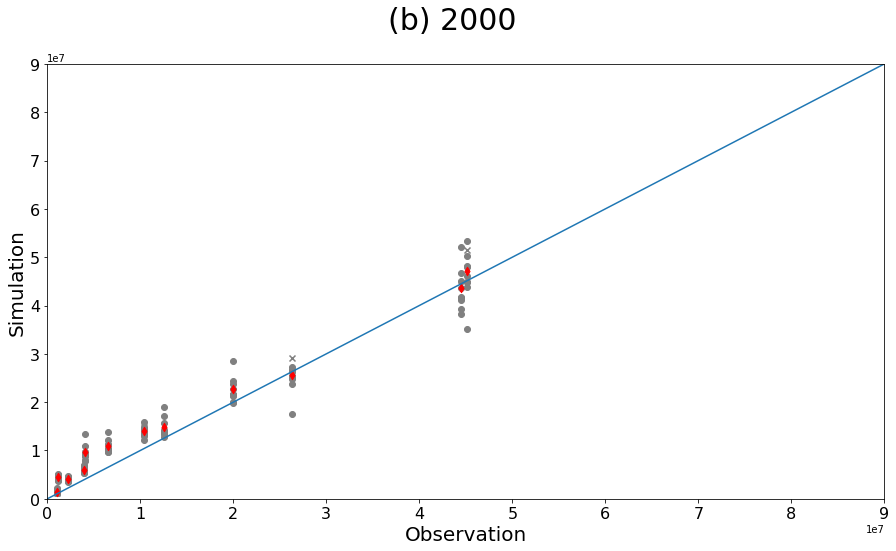

In [76]:
fig = plt.figure(figsize=(15, 8))

plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,9e7])
plt.ylim([0,9e7])

plt.plot([0,9e7],[0,9e7])
#plt.ylabel('Simulation')
plt.suptitle('(b) 2000', fontsize=30)
fig.savefig('Figure4B_isimip3a_production_states_2000.png',dpi=150)

In [77]:
#Data for the year 2005
df = pd.DataFrame(columns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs'])
thecolumns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs']
Data=production_2005_isimip3a
#Ontario
pp=np.empty(shape=(13))
ptlist=list(pnt_ON['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Ontario (ON)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Quibec
pp=np.empty(shape=(13))
ptlist=list(pnt_QC['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Quebec (QC)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


#'Iowa (IA)'
pp=np.empty(shape=(13))
ptlist=list(pnt_IA['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Iowa (IA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Minnesota(MN)
pp=np.empty(shape=(13))
ptlist=list(pnt_MN['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Minnesota(MN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Wisconsin(WI)
ptlist=list(pnt_WI['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Wisconsin(WI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Illinois(IL)
ptlist=list(pnt_IL['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Illinois(IL)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Michigan(MI)
ptlist=list(pnt_MI['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Michigan(MI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Indiana(IN)
ptlist=list(pnt_IN['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Indiana(IN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


#Ohio (OH)
ptlist=list(pnt_OH['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Ohio (OH)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#New York (NY)
ptlist=list(pnt_NY['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['New York (NY)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Pennsylvania(PA)
ptlist=list(pnt_PA['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Pennsylvania(PA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Maryland(MD)
ptlist=list(pnt_MD['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Maryland(MD)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)



In [78]:
df.to_csv('isimip3a_12states_production_2005.csv')
df

,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),7723087.0,9439252.0,9069897.0,8097524.0,7992465.0,8384763.0,8925496.0,8635146.0,8625598.0,8055725.0,6668058.0,8328819.0,4671338.0
1,Quebec (QC),3466037.0,5036454.0,4663051.0,4431852.0,3972943.0,3657873.0,4406861.0,4266809.0,4335070.0,4038826.0,4345948.0,4238338.0,2973839.0
2,Iowa (IA),36672515.0,44324343.0,41722007.0,42495617.0,46076815.0,41988775.0,47279894.0,45229818.0,45994467.0,36907803.0,42699362.0,42853765.0,53737426.0
3,Minnesota(MN),32570848.0,24428605.0,27427506.0,26922851.0,24814676.0,26121307.0,27478109.0,25913403.0,25965421.0,24672515.0,27641615.0,26723351.0,29638455.0
4,Wisconsin(WI),11396283.0,13477259.0,13019094.0,12502792.0,12881804.0,12824127.0,14677107.0,12921492.0,13236930.0,12371442.0,11224131.0,12775678.0,10712999.0
5,Illinois(IL),21199149.0,34829551.0,31156654.0,29313419.0,34297613.0,23783464.0,34756463.0,33735239.0,37515798.0,28680396.0,23478066.0,30249619.0,47675560.0
6,Michigan(MI),6701009.0,9790670.0,8933843.0,8369983.0,9152813.0,9548079.0,9426619.0,9609368.0,9359445.0,9030888.0,8063926.0,8907877.0,6868217.0
7,Indiana(IN),18421569.0,18659591.0,19379545.0,18888280.0,18865914.0,17138222.0,18987577.0,19119723.0,19704028.0,17277110.0,18200340.0,18603809.0,20868390.0
8,Ohio (OH),11012119.0,12012672.0,12761748.0,11828329.0,11850096.0,11998530.0,12295260.0,12540593.0,12867032.0,10688436.0,11007542.0,11896578.0,11735812.0
9,New York (NY),3846435.0,4327678.0,4186497.0,4269405.0,4068264.0,4314618.0,4168951.0,4208548.0,4398605.0,3913322.0,3842252.0,4140416.0,1496746.0


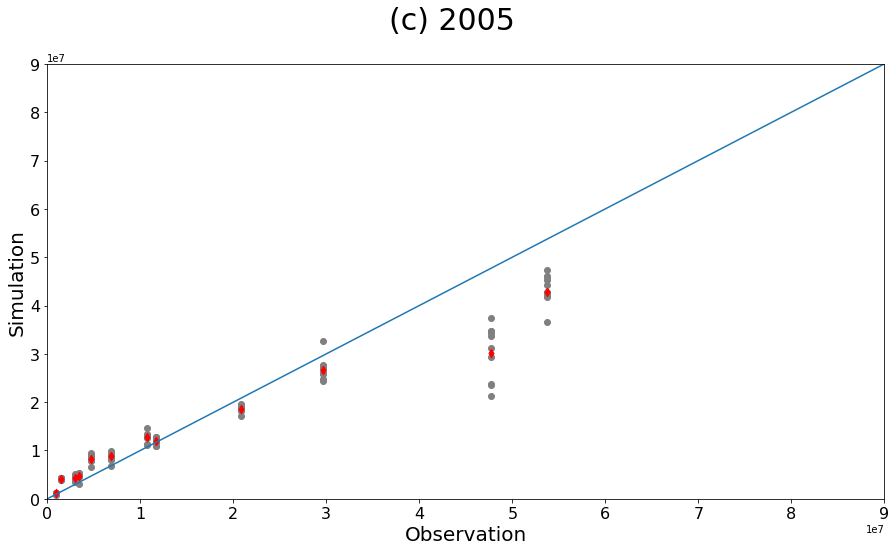

In [79]:
fig = plt.figure(figsize=(15, 8))

plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,9e7])
plt.ylim([0,9e7])

plt.plot([0,9e7],[0,9e7])
#plt.ylabel('Simulation')
plt.suptitle('(c) 2005', fontsize=30)
fig.savefig('Figure4C_isimip3a_production_states_2005.png',dpi=150)

In [80]:
#Data for the year 2010
df = pd.DataFrame(columns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs'])
thecolumns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs']
Data=production_2010_isimip3a
#Ontario
pp=np.empty(shape=(13))
ptlist=list(pnt_ON['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Ontario (ON)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Quibec
pp=np.empty(shape=(13))
ptlist=list(pnt_QC['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Quebec (QC)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


#'Iowa (IA)'
pp=np.empty(shape=(13))
ptlist=list(pnt_IA['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Iowa (IA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Minnesota(MN)
pp=np.empty(shape=(13))
ptlist=list(pnt_MN['Unnamed: 0'])

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Minnesota(MN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Wisconsin(WI)
ptlist=list(pnt_WI['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Wisconsin(WI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Illinois(IL)
ptlist=list(pnt_IL['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Illinois(IL)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Michigan(MI)
ptlist=list(pnt_MI['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Michigan(MI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Indiana(IN)
ptlist=list(pnt_IN['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Indiana(IN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


#Ohio (OH)
ptlist=list(pnt_OH['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Ohio (OH)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#New York (NY)
ptlist=list(pnt_NY['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['New York (NY)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Pennsylvania(PA)
ptlist=list(pnt_PA['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Pennsylvania(PA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

#Maryland(MD)
ptlist=list(pnt_MD['Unnamed: 0'])
pp=np.empty(shape=(13))

for ii in range(13):
    thedata=Data[ii,:,:].flatten()[ptlist]
    pp[ii]=np.around(np.nansum(thedata),0)
df = pd.concat([df, pd.DataFrame([['Maryland(MD)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)



In [81]:
df.to_csv('isimip3a_12states_production_2010.csv')
df

,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),9493144.0,9022412.0,9312793.0,9087179.0,8053642.0,8320243.0,8398301.0,9040033.0,8782231.0,2.757277e+282,9663203.0,8917318.0,4890980.0
1,Quebec (QC),5121382.0,4751446.0,4793667.0,4893436.0,3963616.0,4173331.0,4371419.0,4332104.0,4339787.0,3.013028e+282,4351307.0,4509150.0,4260553.0
2,Iowa (IA),83828728.0,40315374.0,57064325.0,52136529.0,45371203.0,40810456.0,44445961.0,50494790.0,46744651.0,2.286103e+281,49859544.0,51107156.0,57630852.0
3,Minnesota(MN),47962425.0,26418720.0,31920579.0,31273696.0,25911204.0,26290569.0,25381456.0,28030515.0,26050608.0,8.994967e+281,25286425.0,29452620.0,32760672.0
4,Wisconsin(WI),20446060.0,12328964.0,15078553.0,14945593.0,12302770.0,11513599.0,12954066.0,13886789.0,13374268.0,4.814769e+280,13382249.0,14021291.0,13479854.0
5,Illinois(IL),52583357.0,32883327.0,42461554.0,40384340.0,37135312.0,34043280.0,35559072.0,39985229.0,38082843.0,1.044015e+277,41778055.0,39489637.0,50821651.0
6,Michigan(MI),8674344.0,8952690.0,9360850.0,8524427.0,8793388.0,8979152.0,8864045.0,9939593.0,9446400.0,6.456779e+281,10119152.0,9165404.0,7996399.0
7,Indiana(IN),17362883.0,19059208.0,18846118.0,19144817.0,19387965.0,17169132.0,18896231.0,20251919.0,19674536.0,6.691005e+275,19980006.0,18977282.0,21386976.0
8,Ohio (OH),10133677.0,12396753.0,11274520.0,10948905.0,12133236.0,11945409.0,12491458.0,13150884.0,12831456.0,6.915166e+281,13484439.0,12079074.0,13198292.0
9,New York (NY),4656505.0,4191697.0,4751277.0,4394567.0,4297815.0,3875857.0,4206983.0,4553805.0,4373371.0,1.195205e+276,4357294.0,4365917.0,2067606.0


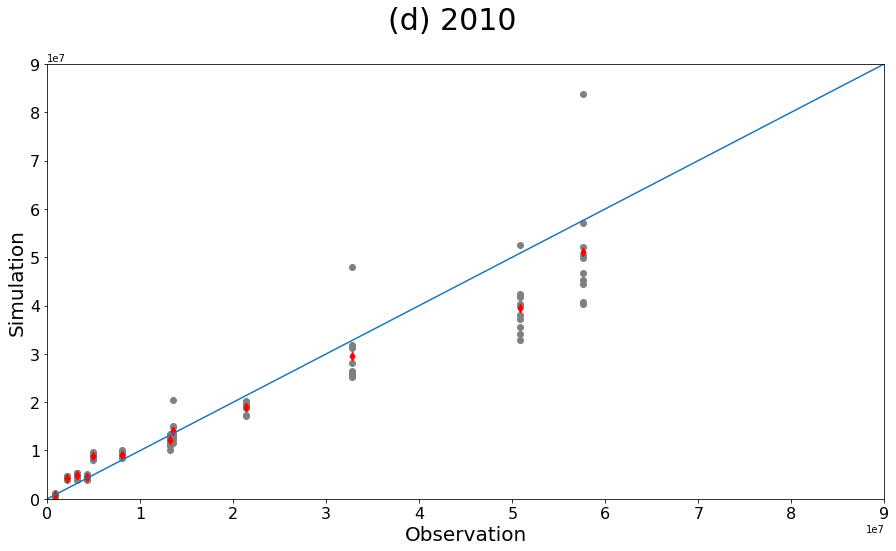

In [82]:
fig = plt.figure(figsize=(15, 8))

plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,9e7])
plt.ylim([0,9e7])

plt.plot([0,9e7],[0,9e7])
#plt.ylabel('Simulation')
plt.suptitle('(d) 2010', fontsize=30)
fig.savefig('Figure4D_isimip3a_production_states_2010.png',dpi=150)